In [2]:
#Alejandra Macias

#Data from a store that has ECommerce(with mobile app and website) 
#as well as having a Store location. 
#whats to know where their time is better spent whether on the app or 
#on the website. 

In [4]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#read the csv file as a dataframe

df = pd.read_csv("Ecommerce Customers")

In [6]:
#check the head of the df
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
#describe
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
#info: display the information that you have of the customers, columns, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [10]:
#EDA!!!
#compare the amount of time spent on the the webiste and the amount 
#of money that is spent yearly
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')


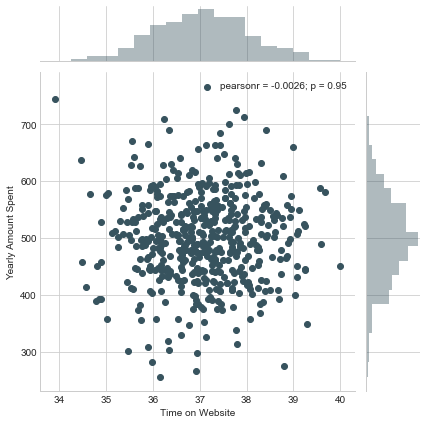

In [13]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)
#more time on the site= more money spent

In [ ]:
#now check the time vs money of the app

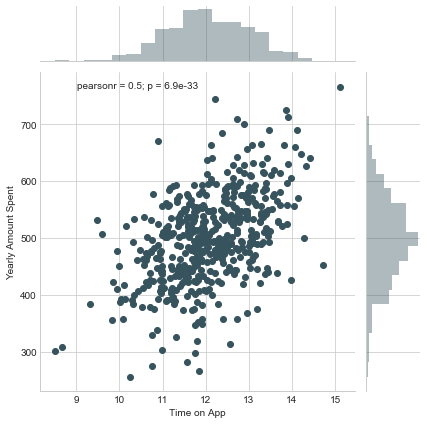

In [14]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

In [16]:
#train test split
y = df['Yearly Amount Spent']

In [17]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
#train data using the linear regression model
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
#train fit
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#the coeff
print('Coefficients: \n', model.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [24]:
#predicting test values
pred = model.predict(X_test)

Text(0,0.5,'Predicted Y')

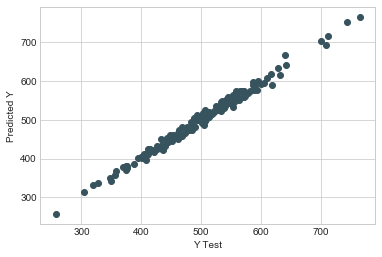

In [26]:
# make visualization of test values using a scater plot
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
#Evaluating the model by calculating the Mean Absolte Error, Root Mean Squared Error
#and the Mean Squared Error
from sklearn import metrics

#Mean Absolte Error
print('MAE:', metrics.mean_absolute_error(y_test, pred))
#Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, pred))
#Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [30]:
#Finally trying to get the answer to the question using the coeff to create a new df
coeff = pd.DataFrame(model.coef_,X.columns)
coeff.columns = ['Coeffecients']
#print
coeff

,Coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
#Answer: The app is working better than the website is, thus the focus should be 
#on the app.